**Load csv**

This code imports the pandas library and loads a CSV file (Levine_32dim.fcs.csv) into a DataFrame called df.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Levine_32dim.fcs.csv')
df

,Event,Time,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,...,CD117,CD49d,HLA-DR,CD64,CD41,Viability,file_number,event_number,label,individual
0,1,2693.00,22,4.391057,4.617262,0.162691,-0.029585,-0.006696,0.066388,-0.009184,...,0.053050,0.853505,1.664480,-0.005376,-0.001961,0.648429,3.627711,307,1.0,1
1,2,3736.00,35,4.340481,4.816692,0.701349,-0.038280,-0.016654,0.074409,0.808031,...,0.089660,0.197818,0.491592,0.144814,0.868014,0.561384,3.627711,545,1.0,1
2,3,7015.00,32,3.838727,4.386369,0.603568,-0.032216,0.073855,-0.042977,-0.001881,...,0.046222,2.586670,1.308337,-0.010961,-0.010413,0.643337,3.627711,1726,1.0,1
3,4,7099.00,29,4.255806,4.830048,0.433747,-0.027611,-0.017661,-0.044072,0.733698,...,0.066470,1.338669,0.140523,-0.013449,-0.026039,-0.026523,3.627711,1766,1.0,1
4,5,7700.00,25,3.976909,4.506433,-0.008809,-0.030297,0.080423,0.495791,1.107627,...,-0.006223,0.180924,0.197332,0.076167,-0.040488,0.283287,3.627711,2031,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265622,265623,707951.44,41,6.826629,7.133022,1.474081,-0.019174,-0.055620,-0.007261,0.063395,...,-0.011105,0.533736,0.123758,-0.042495,-0.027971,0.236957,3.669327,102686,NaN,2
265623,265624,708145.44,45,6.787791,7.154026,0.116755,-0.056213,-0.008864,-0.035158,-0.041845,...,0.143869,1.269464,0.047215,-0.008000,-0.025811,-0.003500,3.669327,102690,NaN,2
265624,265625,708398.44,41,6.889866,7.141219,0.684921,-0.006264,-0.026111,-0.030837,-0.034641,...,0.087102,-0.055912,0.501536,0.053884,-0.042602,0.107206,3.669327,102701,NaN,2
265625,265626,708585.44,39,6.865218,7.144353,0.288761,-0.011310,-0.048786,0.073983,-0.031787,...,-0.047971,0.101955,6.200001,0.296877,0.192786,0.620872,3.669327,102706,NaN,2


This line retrieves the column names of the DataFrame df.

In [ ]:
df.columns

This code accesses the 'Viability' column of the DataFrame.

In [ ]:
df['Viability']

**Null and Non null values**

The code calculates and prints the number of null and non-null values for each column in the DataFrame.

In [ ]:
null_values = df.isnull().sum()
non_null_values = df.notnull().sum()
print("Null values in each column:")
print(null_values)
print("\nNon-null values in each column:")
print(non_null_values)


This block identifies columns and rows that contain null values.

In [ ]:
columns_with_null = df.columns[df.isnull().any()]
rows_with_null_values = df[columns_with_null][df[columns_with_null].isnull().any(axis=1)]
rows_with_null_values

**Comparison between null and non null values**

This code visualizes the comparison between null and non-null values in each column using a bar chart.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

bar_width = 0.35
index = np.arange(len(df.columns))

plt.figure(figsize=(10,6))

plt.bar(index, null_counts, bar_width, label='Null Values', color='red', alpha=0.7)
plt.bar(index + bar_width, non_null_counts, bar_width, label='Non-null Values', color='green', alpha=0.7)

plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Comparison of Null and Non-null Values')
plt.xticks(index + bar_width / 2, df.columns, rotation=90)

plt.legend()
plt.tight_layout()
plt.show()


**Class label distribution**

This code plots the distribution of the 'label' column, showing how many instances of each class are present.

In [ ]:
label_distribution = df['label'].value_counts()

plt.figure(figsize=(6,4))
label_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Correlation matrix**

This code calculates and visualizes the correlation matrix for numeric columns using a heatmap.

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

This block visualizes the correlation matrix again, but with annotations showing the exact correlation values.

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Range of each feature**

This code plots the minimum and maximum values of each numeric feature using a bar chart.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

min_values = df[numeric_columns].min()
max_values = df[numeric_columns].max()

index = np.arange(len(numeric_columns))

plt.figure(figsize=(10,6))

plt.bar(index - 0.2, min_values, 0.4, label='Min Values', color='skyblue')
plt.bar(index + 0.2, max_values, 0.4, label='Max Values', color='lightgreen')

plt.xlabel('Features')
plt.ylabel('Value Range')
plt.title('Range (Min and Max) of Each Feature')
plt.xticks(index, numeric_columns, rotation=90)

plt.legend()
plt.tight_layout()
plt.show()


Range after removing 'file_number', 'Event', 'Time', 'event_number'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

filtered_df = df.drop(columns=['file_number', 'Event', 'Time', 'event_number'])
numeric_columns = filtered_df.select_dtypes(include=['float64', 'int64']).columns

min_values = filtered_df[numeric_columns].min()
max_values = filtered_df[numeric_columns].max()

index = np.arange(len(numeric_columns))

plt.figure(figsize=(10, 6))
plt.bar(index - 0.2, min_values, 0.4, label='Min Values', color='skyblue')
plt.bar(index + 0.2, max_values, 0.4, label='Max Values', color='lightgreen')

plt.xlabel('Features')
plt.ylabel('Value Range')
plt.title('Range (Min and Max) of Each Feature')
plt.xticks(index, numeric_columns, rotation=90)

plt.legend()
plt.tight_layout()
plt.show()


This code prints the minimum and maximum values for each numeric feature in the DataFrame.
It gives a textual overview of the range of values

In [ ]:
min_values = df[numeric_columns].min()
max_values = df[numeric_columns].max()

print("Range of Each Feature:")
for col in numeric_columns:
    print(f"{col}: Min = {min_values[col]}, Max = {max_values[col]}")


**Box plot**

This line generates and displays summary statistics (like mean, std, min, max) for the DataFrame's numeric columns.

In [ ]:
summary_stats = df.describe()
summary_stats

This code creates a box plot for the numeric features in the DataFrame, showing their spread, quartiles, and outliers.

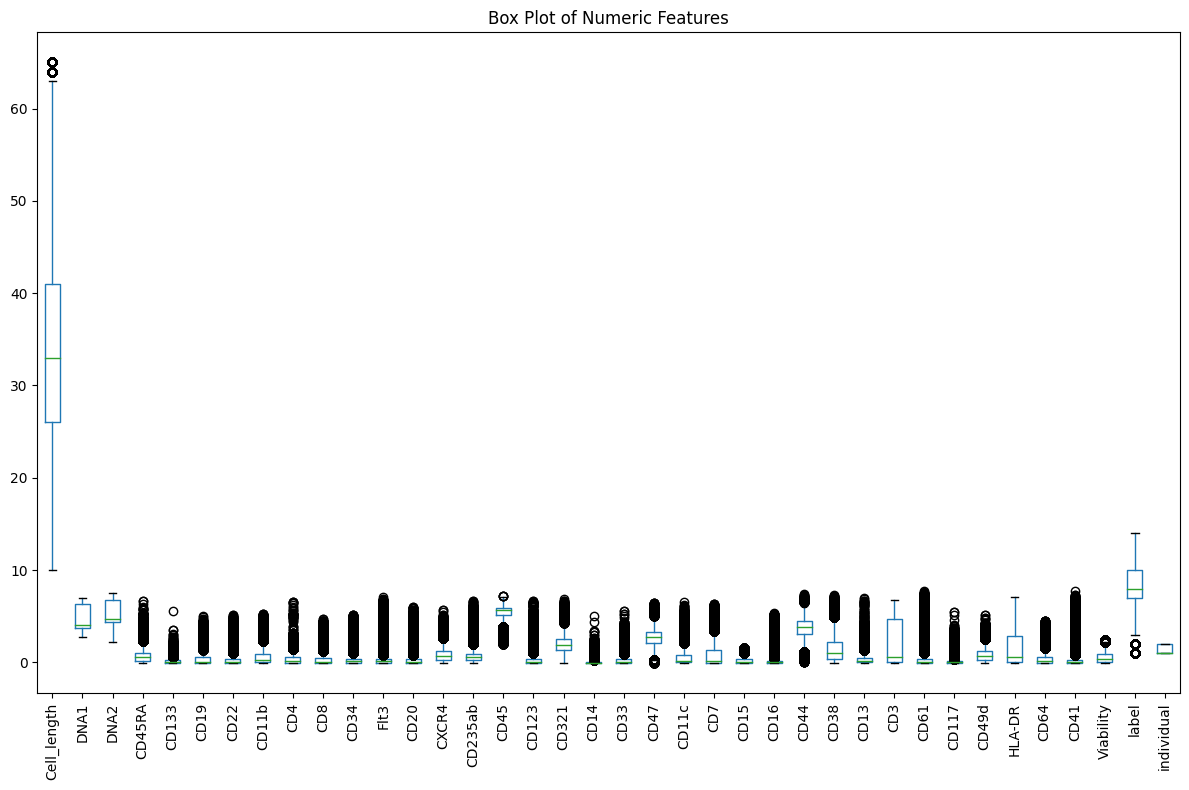

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
df[numeric_columns].boxplot(grid=False)
plt.xticks(rotation=90)
plt.title('Box Plot of Numeric Features')
plt.tight_layout()
plt.show()


This code creates individual box plots for each column (after dropping certain irrelevant columns).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df.drop(columns=['file_number', 'Event', 'Time', 'event_number'])

for column in filtered_df.columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=filtered_df[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()


**Skewness and kertosis**

This code calculates and prints the skewness and kurtosis for each feature .
Skewness measures asymmetry, while kurtosis indicates the tailedness of the distribution, giving insights into the shape of the data.

In [ ]:
from scipy.stats import skew, kurtosis

filtered_df = df.drop(columns=['file_number', 'Event', 'Time','event_number'])

for column in filtered_df.columns:
    skewness = skew(filtered_df[column].dropna())
    kurt = kurtosis(filtered_df[column].dropna())
    print(f'Feature: {column}')
    print(f'Skewness: {skewness:.4f}')
    print(f'Kurtosis: {kurt:.4f}\n')


This code calculates the skewness and kurtosis for each feature in the dataset and stores the values. It then visualizes these values using a bar chart, showing the distribution characteristics (asymmetry and tailedness) of each feature.

In [ ]:
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

filtered_df = df.drop(columns=['file_number', 'Event', 'Time','event_number'])

skewness_values = []
kurtosis_values = []
columns = filtered_df.columns

for column in columns:
    skewness_values.append(skew(filtered_df[column].dropna()))
    kurtosis_values.append(kurtosis(filtered_df[column].dropna()))

index = range(len(columns))
plt.figure(figsize=(12, 6))

plt.bar(index, skewness_values, width=0.4, label='Skewness', align='center', color='skyblue')
plt.bar(index, kurtosis_values, width=0.4, label='Kurtosis', align='edge', color='lightgreen')

plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Skewness and Kurtosis of Each Feature')
plt.xticks(index, columns, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


This code calculates the skewness and kurtosis for each feature in the dataset individually. It then generates a bar chart for each feature, comparing its skewness and kurtosis values, with a y-axis range of -3 to 3 for visual consistency.

In [ ]:
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

filtered_df = df.drop(columns=['file_number', 'Event', 'Time','event_number'])
columns = filtered_df.columns

for column in columns:
    skewness = skew(filtered_df[column].dropna())
    kurt = kurtosis(filtered_df[column].dropna())

    plt.figure(figsize=(8, 4))
    plt.bar(['Skewness', 'Kurtosis'], [skewness, kurt], color=['skyblue', 'lightgreen'])
    plt.ylabel('Value')
    plt.title(f'Skewness and Kurtosis for {column}')
    plt.ylim([-3, 3])
    plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
    plt.show()


This code generates probability density curves for leptokurtic, mesokurtic, and platykurtic distributions using the normal distribution function. It then plots these curves on the same graph to compare different kurtosis types visually.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-5, 5, 1000)

mesokurtic = norm.pdf(x, 0, 1)
leptokurtic = norm.pdf(x, 0, 0.7)
platykurtic = norm.pdf(x, 0, 1.5)

plt.figure(figsize=(8, 6))
plt.plot(x, leptokurtic, label='Leptokurtic', color='blue', linewidth=2)
plt.plot(x, mesokurtic, label='Mesokurtic', color='black', linewidth=2)
plt.plot(x, platykurtic, label='Platykurtic', color='red', linewidth=2)

plt.title('Comparison of Kurtosis Types', fontsize=16)
plt.xlabel('X-axis')
plt.ylabel('Probability Density')

plt.legend()

plt.show()


This code generates and plots positive skew, negative skew, and no skew (normal distribution) using the skew normal distribution function. The graph visually compares how skewness affects the shape of the probability density curves.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, norm

x = np.linspace(-5, 5, 1000)

positive_skew = skewnorm.pdf(x, 5)
negative_skew = skewnorm.pdf(x, -5)
normal_dist = skewnorm.pdf(x, 0)

plt.figure(figsize=(8, 6))
plt.plot(x, positive_skew, label='Positive Skew', color='blue', linewidth=2)
plt.plot(x, normal_dist, label='No Skew (Normal)', color='black', linewidth=2)
plt.plot(x, negative_skew, label='Negative Skew', color='red', linewidth=2)
plt.title('Skewness Comparison', fontsize=16)
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


This code creates a grid of subplots, where it visualizes both skewness and kurtosis for each feature in the dataset. For skewness, histograms with kernel density estimation are plotted, while for kurtosis, histograms are compared to the normal distribution curve to show the tailedness.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

filtered_df = df.drop(columns=['file_number', 'Event', 'Time','event_number'])
columns = filtered_df.columns
n_features = len(columns)

n_cols = 4
n_rows = int(np.ceil(n_features * 2 / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))
axes = axes.flatten()

def plot_skewness(column_data, column_name, ax):
    sns.histplot(column_data.dropna(), kde=True, stat="density", linewidth=0, ax=ax, color='blue')
    ax.axvline(x=np.mean(column_data.dropna()), color='red', linestyle='--', label='Mean')
    ax.axvline(x=np.median(column_data.dropna()), color='green', linestyle='--', label='Median')
    ax.set_title(f'Skewness: {column_name}')
    ax.legend()

def plot_kurtosis(column_data, column_name, ax):
    sns.histplot(column_data.dropna(), kde=True, stat="density", linewidth=0, ax=ax, color='orange', label='Data')
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(column_data.dropna()), np.std(column_data.dropna()))
    ax.plot(x, p, 'k', linewidth=2, label='Normal Dist')
    ax.set_title(f'Kurtosis: {column_name}')
    ax.legend()

for i, column in enumerate(columns):
    plot_skewness(filtered_df[column], column, axes[2*i])
    plot_kurtosis(filtered_df[column], column, axes[2*i + 1])

plt.tight_layout()
plt.show()


**Dimensionality reduction**

PCA

**pca and tsne**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Standardize all columns in the dataset
df[:] = scaler.fit_transform(df)

# Check the standardized data
print(df.head())


      Event      Time  Cell_length      DNA1      DNA2    CD45RA     CD133  \
0  0.000000  0.003796     0.218182  0.380681  0.454713  0.032599  0.005102   
1  0.000004  0.005267     0.454545  0.368682  0.492802  0.112418  0.003545   
2  0.000008  0.009891     0.400000  0.249642  0.410614  0.097929  0.004631   
3  0.000011  0.010010     0.345455  0.348593  0.495353  0.072765  0.005455   
4  0.000015  0.010857     0.272727  0.282425  0.433546  0.007186  0.004974   

       CD19      CD22     CD11b  ...     CD117     CD49d    HLA-DR      CD64  \
0  0.010180  0.023713  0.009222  ...  0.019914  0.174915  0.242242  0.011544   
1  0.008208  0.025250  0.162862  ...  0.026499  0.049100  0.077290  0.044364   
2  0.026137  0.002753  0.010595  ...  0.018686  0.507480  0.192154  0.010323   
3  0.008008  0.002543  0.148887  ...  0.022328  0.268010  0.027916  0.009779   
4  0.027438  0.106009  0.219187  ...  0.009253  0.045858  0.035906  0.029363   

       CD41  Viability  file_number  event_number 

<ipython-input-2-06590f96526d>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00000000e+00 3.76469171e-06 7.52938342e-06 ... 9.99992471e-01
 9.99996235e-01 1.00000000e+00]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[:] = scaler.fit_transform(df)
<ipython-input-2-06590f96526d>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.21818182 0.45454545 0.4        ... 0.56363636 0.52727273 0.56363636]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[:] = scaler.fit_transform(df)
<ipython-input-2-06590f96526d>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00076479 0.00135962 0.0043113  ... 0.25667877 0.25669127 0.25672626]' has dtype incompatible with int64, please explicitly cas

     Standard deviation  Proportion of Variance  Cumulative Proportion
PC1            2.327669                0.154801               0.154801
PC2            1.957437                0.109473               0.264273
PC3            1.877982                0.100766               0.365039
PC4            1.606712                0.073758               0.438797


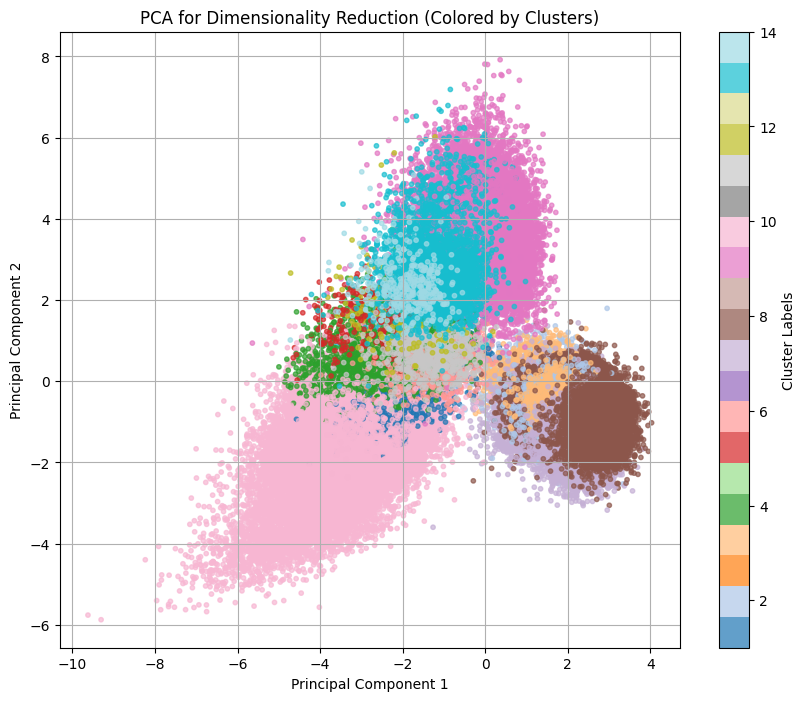

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded and 'label' column exists for cluster labeling
filtered_df = df.drop(columns=['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual'])
labels = df['label']  # Assuming you have a 'label' column indicating clusters

imputer = SimpleImputer(strategy='mean')
filled_df = imputer.fit_transform(filtered_df)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filled_df)

# Perform PCA
pca = PCA(n_components=4)  # Set to 4 components for demonstration
pca_transformed = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_dev = np.sqrt(pca.explained_variance_)

# Create a summary table for PCA results
pca_summary = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(std_dev))])

print(pca_summary)

# Scatter plot for the first two components, with different colors for different clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=labels, cmap='tab20', s=10, alpha=0.7)
plt.colorbar(scatter, label='Cluster Labels')
plt.title('PCA for Dimensionality Reduction (Colored by Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


     Standard deviation  Proportion of Variance  Cumulative Proportion
PC1            2.327669                0.154801               0.154801
PC2            1.957437                0.109473               0.264273
PC3            1.877982                0.100766               0.365039
PC4            1.606712                0.073758               0.438797


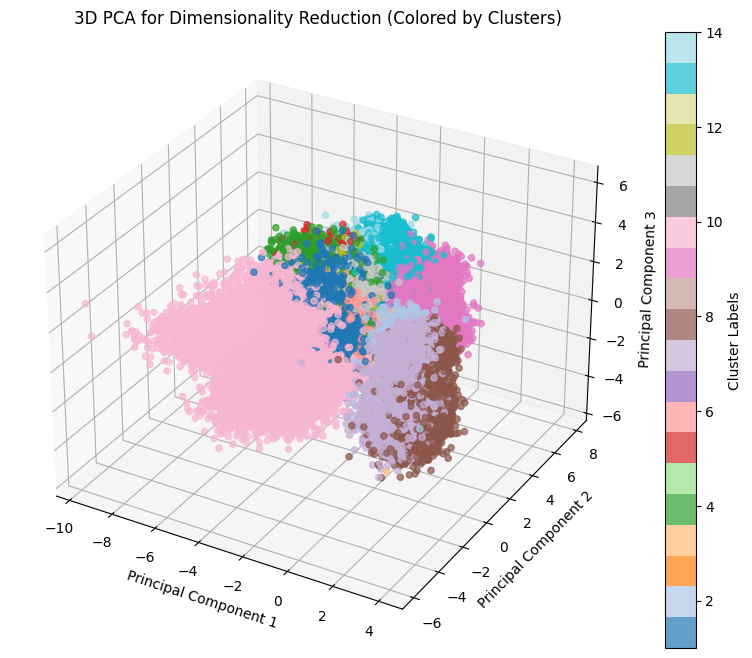

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df is already loaded and 'label' column exists for cluster labeling
filtered_df = df.drop(columns=['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual'])
labels = df['label']  # Assuming you have a 'label' column indicating clusters

imputer = SimpleImputer(strategy='mean')
filled_df = imputer.fit_transform(filtered_df)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filled_df)

# Perform PCA for 4 components
pca = PCA(n_components=4)
pca_transformed = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_dev = np.sqrt(pca.explained_variance_)

# Create a summary table for PCA results
pca_summary = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(std_dev))])

print(pca_summary)

# 3D scatter plot for the first three components, with different colors for different clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2],
                     c=labels, cmap='tab20', s=20, alpha=0.7)

# Add labels and colorbar
ax.set_title('3D PCA for Dimensionality Reduction (Colored by Clusters)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, ax=ax, label='Cluster Labels')

plt.show()


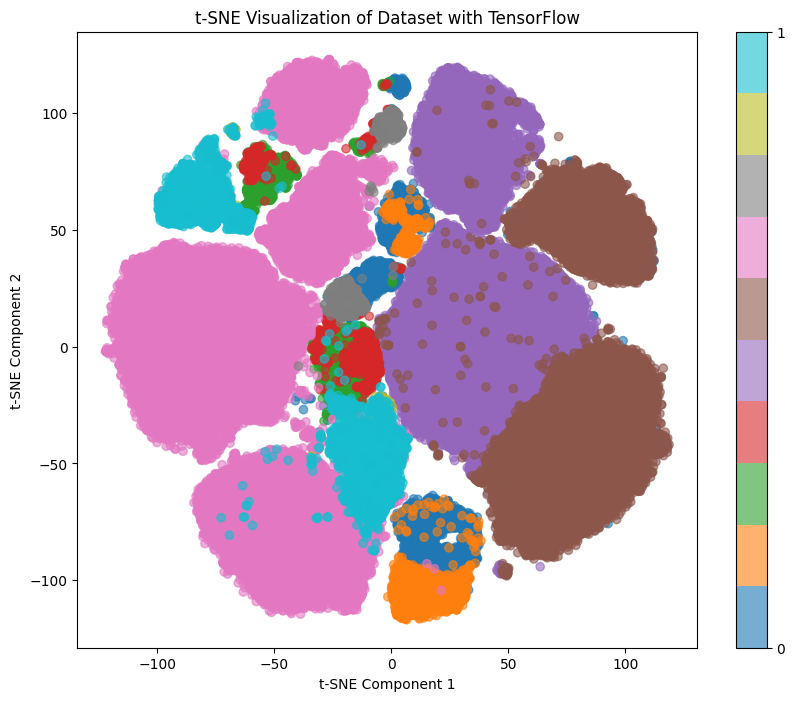

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features = df.drop(columns=exclude_columns)
labels = df['label']

features = features.astype('float32') / features.max()
features_tf = tf.convert_to_tensor(features)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features_tf)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Dataset with TensorFlow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


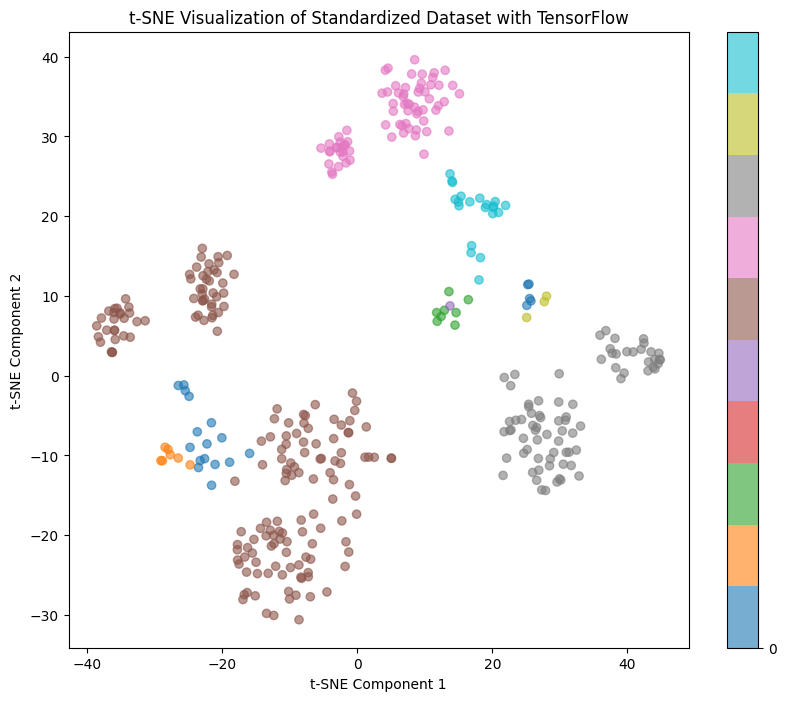

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

sample_df = df.sample(n=1000, random_state=42)  # Reduce the sample size to 1000 rows

# Exclude specific columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features = sample_df.drop(columns=exclude_columns)
labels = sample_df['label']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to TensorFlow tensor
features_tf = tf.convert_to_tensor(features_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features_tf)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Standardized Dataset with TensorFlow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


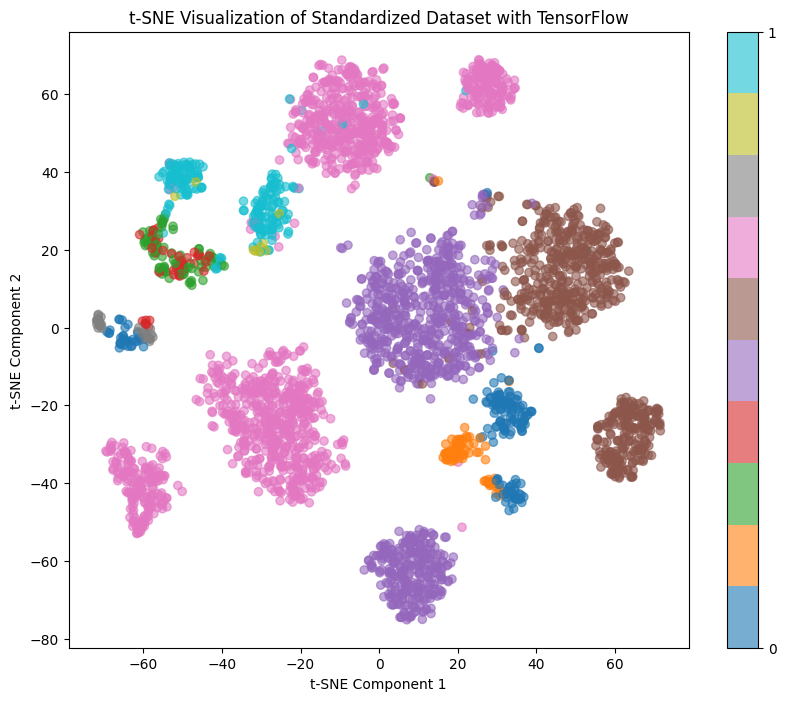

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

sample_df = df.sample(n=9000, random_state=42)  # Reduce the sample size to 1000 rows

# Exclude specific columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features = sample_df.drop(columns=exclude_columns)
labels = sample_df['label']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to TensorFlow tensor
features_tf = tf.convert_to_tensor(features_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features_tf)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Standardized Dataset with TensorFlow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


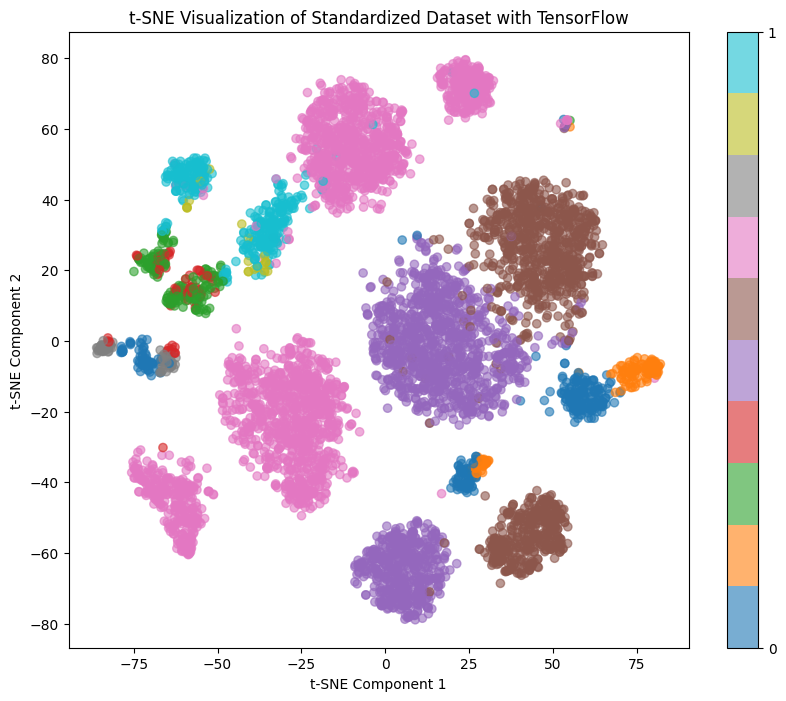

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

sample_df = df.sample(n=15000, random_state=42)  # Reduce the sample size to 1000 rows

# Exclude specific columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features = sample_df.drop(columns=exclude_columns)
labels = sample_df['label']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to TensorFlow tensor
features_tf = tf.convert_to_tensor(features_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features_tf)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Standardized Dataset with TensorFlow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
